Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population
b)	Scatter charts between relevant variables to analyse the relationships
c)	Histogram/frequency charts to analyse the distribution of the data
d)	Heatmap of correlation analysis among the relevant variables
e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 

In [1]:
import sys
import platform
import operator
from math import *
import string
from pandas import Series, DataFrame

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
Diabetes = r"C:\Users\Ansari\Downloads\Datasets\health_care_diabetes.csv"

In [3]:
df= pd.read_csv(Diabetes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
print ((df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [11]:
print ((df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]).count())

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
dtype: int64


In [14]:
df [['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', ]] = df [['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', ]].replace(0,np.NaN)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df.fillna(df.mean(), inplace=True)

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [18]:
print ((df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [11]:
df [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [24]:
df.fillna(df.mean(), inplace=True)

In [25]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
# Dataset contains diabetic and non-diabetic info in the outcome column
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

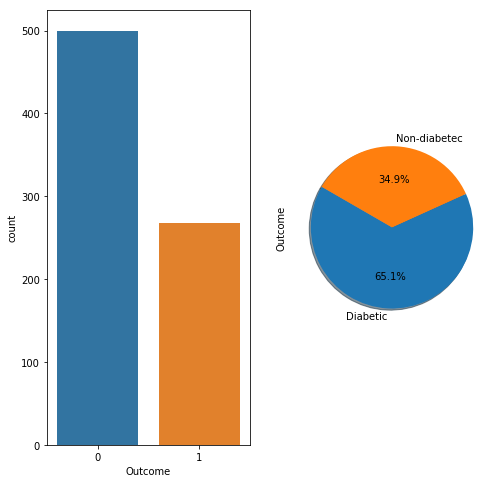

In [13]:
#Countplot - Plot the frequency of outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

# Count of each observation using bars
sns.countplot(df['Outcome'],ax=ax1[0])

# Percentage of diabetic and non-diabeteis patients
labels = 'Diabetic', 'Non-diabetec'
df.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=150)

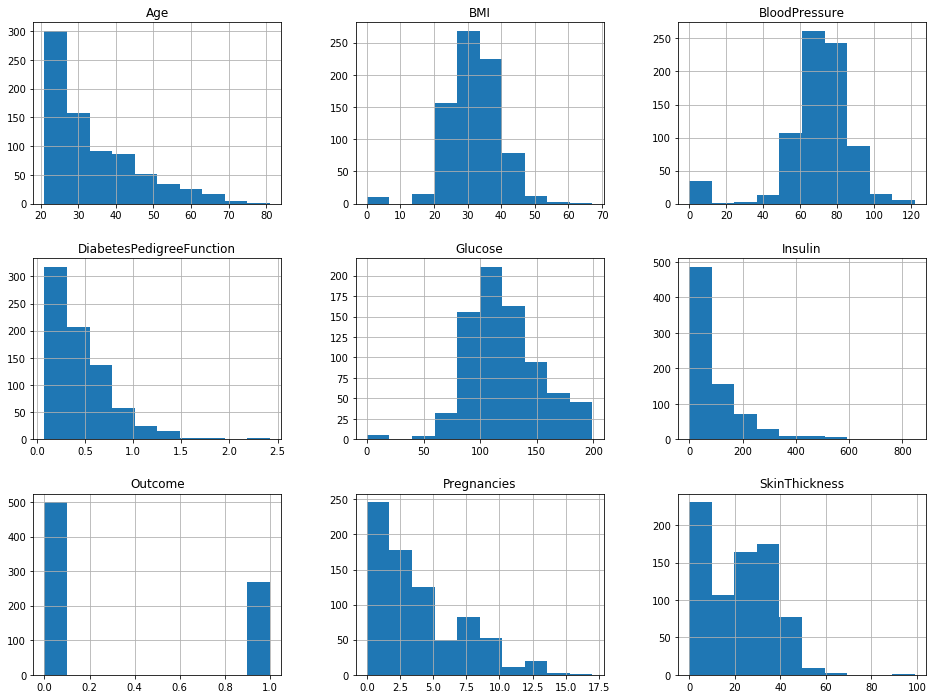

In [14]:
# Distribution of variables using Histogram
df.hist(figsize=(16,12));

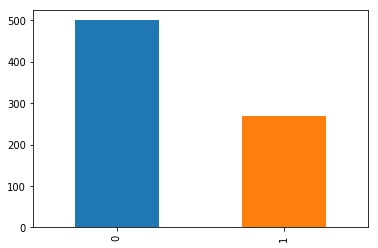

In [30]:
df['Outcome'].value_counts().plot('bar')

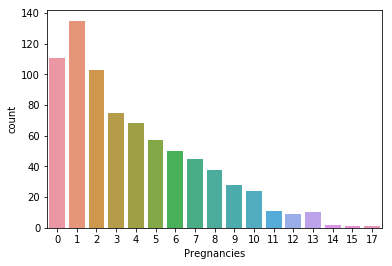

In [15]:
# Count plot for Pregnancies 
sns.countplot(df['Pregnancies'])

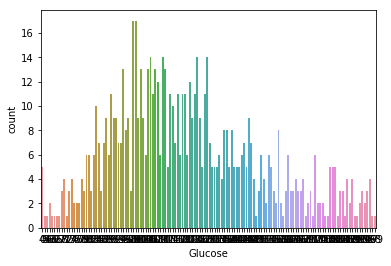

In [16]:
# Count plot for Glucose 
sns.countplot(df['Glucose'])

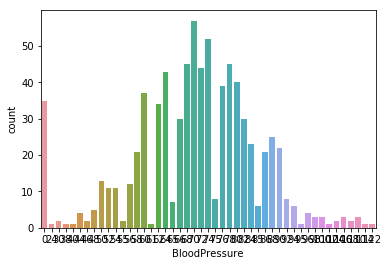

In [17]:
# Count plot for BloodPressure 
sns.countplot(df['BloodPressure'])

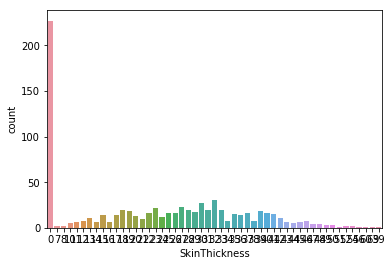

In [18]:
# Count plot for SkinThickness 
sns.countplot(df['SkinThickness'])

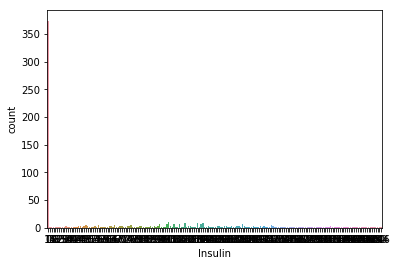

In [19]:
# Count plot for Insulin 
sns.countplot(df['Insulin'])

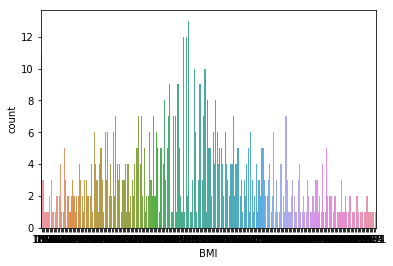

In [20]:
# Count plot for BMI 
sns.countplot(df['BMI'])

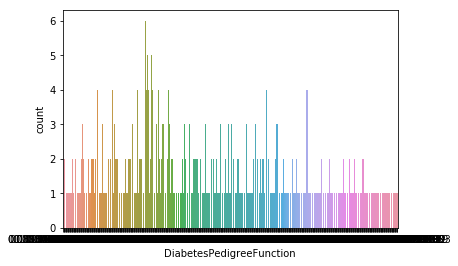

In [21]:
# Count plot for DiabetesPedigreeFunction 
sns.countplot(df['DiabetesPedigreeFunction'])

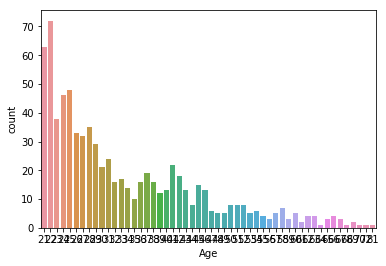

In [22]:
# Count plot for Age 
sns.countplot(df['Age'])

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

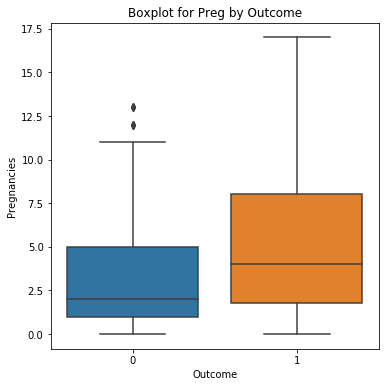

In [27]:
# Plots for count of outcome by values
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

* *In the boxplots, we find few outliers in both subsets. Some of the non-diabetic women have had many pregenancies.* *
* *To validate this hypothesis, we need to statistically test it.* *

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

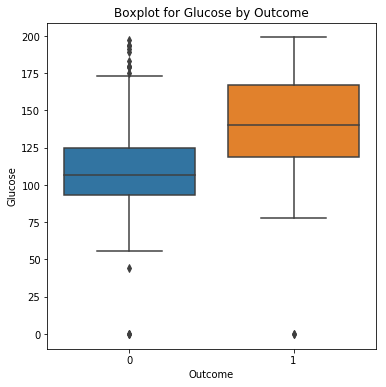

In [28]:
# Plot for glucose
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Glucose)
plt.title("Boxplot for Glucose by Outcome")

* *Glucose data is slightly skewed to right the data set contains over 60% who are diabetic and its likely that their Glucose levels were higher.* *
* *visually skewness seems acceptable (<2) and its also likely that confidence intervels of the means are not overlapping.* *
* *So a hypothesis that Glucose is measure of outcome, is likely to be true. But needs to be statistically tested.* *

Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

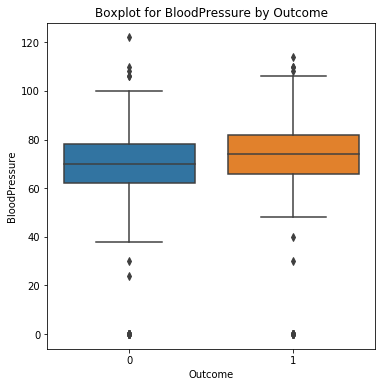

In [29]:
# Plot for BloodPressure
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.BloodPressure)
plt.title("Boxplot for BloodPressure by Outcome")

* *Few outliers in the data. Its likely that some people have low and some have high BloodPressure.* * 
* *So the association between diabetic (Outcome) and BloodPressure needs to be statistically tested.* *

Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome')

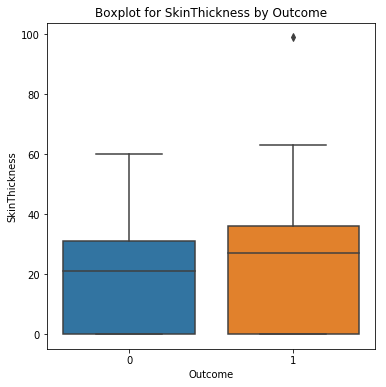

In [30]:
# Plot for SkinThickness
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.SkinThickness)
plt.title("Boxplot for SkinThickness by Outcome")

* *People who are not diabetic have lower skin thickness. This hypothesis needs to be validated.* *
* *As data of non-diabetic is skewed but diabetic samples seems to be normally distributed.* *

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

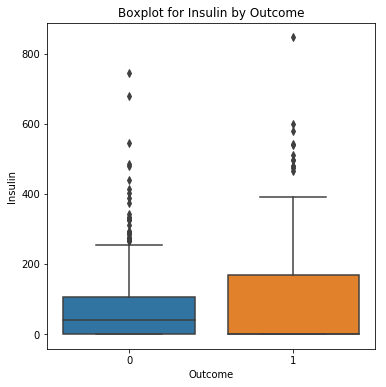

In [31]:
# plot for Insulin
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Insulin)
plt.title("Boxplot for Insulin by Outcome")

* *There are Outliers in this data. These Outliers are concern for us and most of them with higher insulin values are also diabetic.* *

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

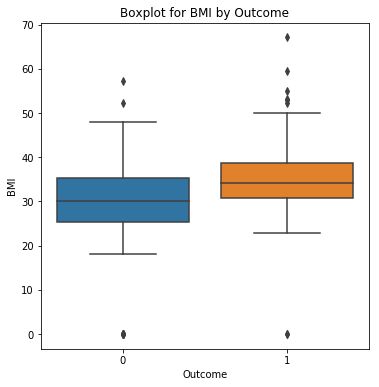

In [32]:
# Plot for BMI
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.BMI)
plt.title("Boxplot for BMI by Outcome")

* *BMI also has outliers. People on the higher side of BMI have diabetes.* *

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

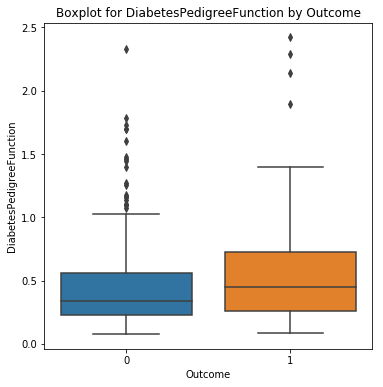

In [33]:
# Plot for Diabetes Pedigree Function
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

* *As Diabetes Pedigree Function increases, there is a strong likelihood of being diabetic, but needs statistical evaluated.* *

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

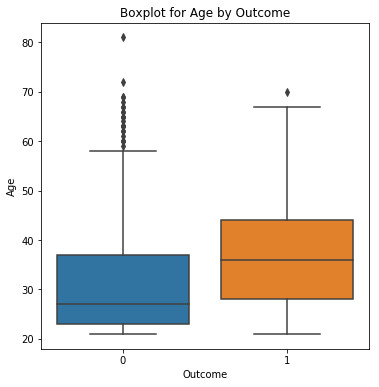

In [34]:
# Plot for Age
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Age)
plt.title("Boxplot for Age by Outcome")

* *Age data also has outliers. The more the age goes up, the more people are prone to diabetes* *

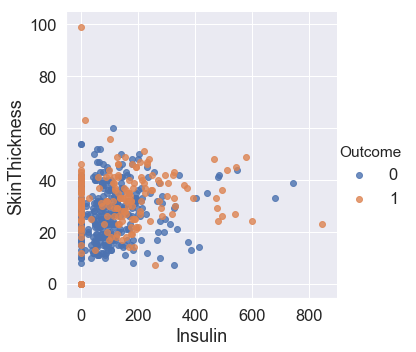

In [129]:
# Plot with outcome and variables
sns.lmplot(x='Insulin',y='SkinThickness',data=df,fit_reg=False,hue='Outcome')

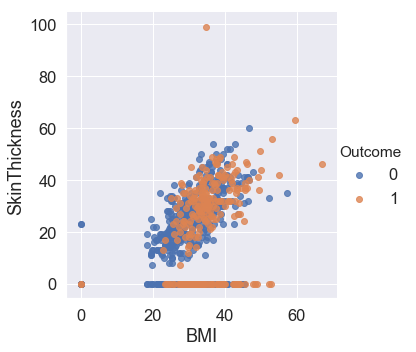

In [130]:
sns.lmplot(x='BMI',y='SkinThickness',data=df,fit_reg=False,hue='Outcome')

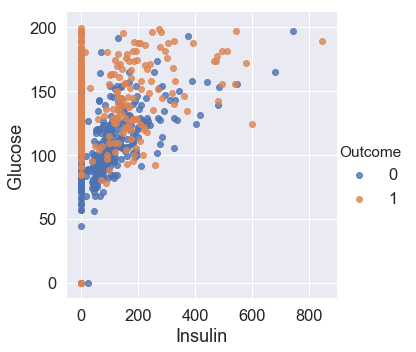

In [131]:
sns.lmplot(x='Insulin',y='Glucose',data=df,fit_reg=False,hue='Outcome')

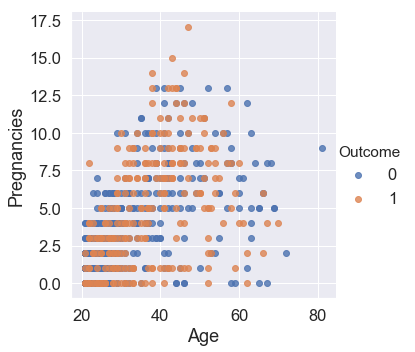

In [132]:
sns.lmplot(x='Age',y='Pregnancies',data=df,fit_reg=False,hue='Outcome')

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

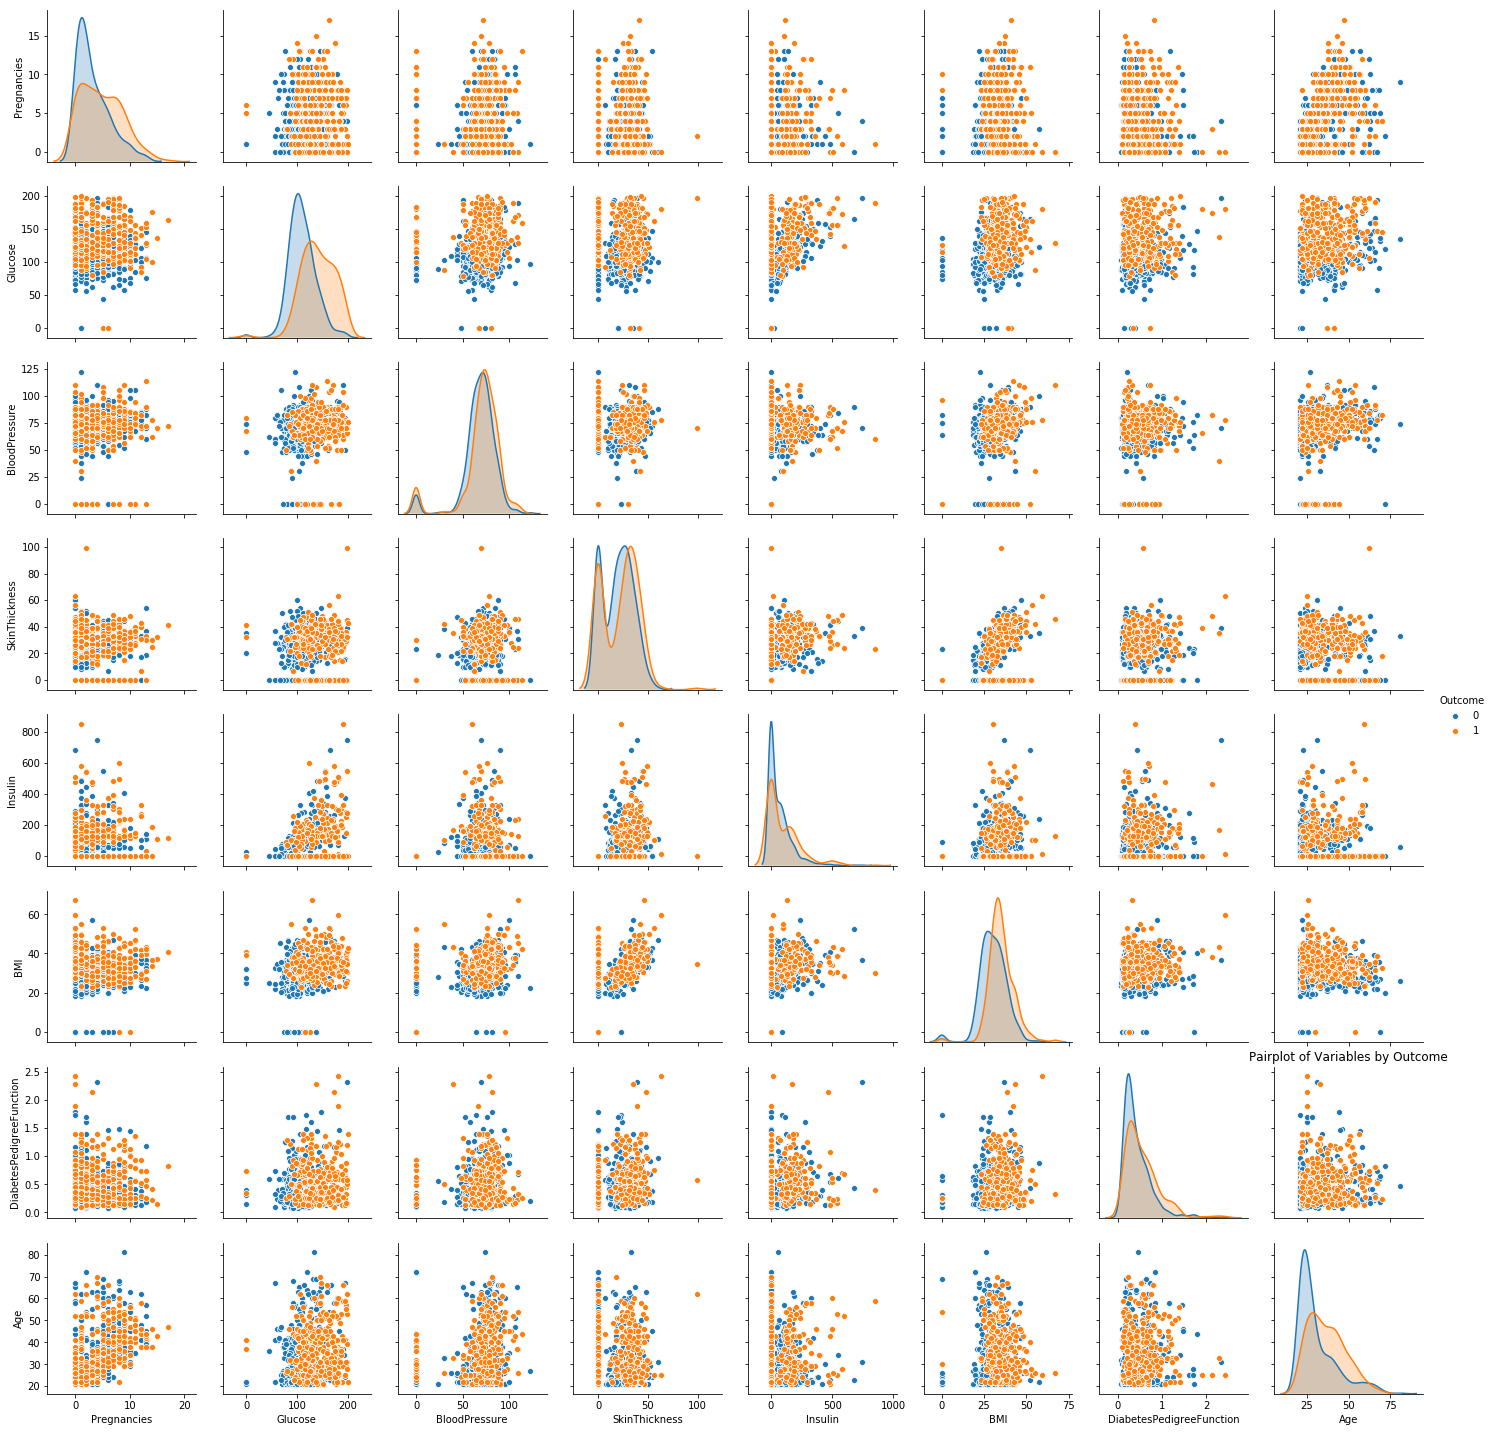

In [35]:
# 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future 
#course of actions.

sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

**The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,**

* *Pregnancies and age have a linear line.* *
* *BloodPressure and age have little relation. Most of the aged people have BloodPressure.* *
* *Insulin and Glucose have some relation.* *

In [37]:
# 6.Perform correlation analysis. Visually explore it using a heat map
cor = df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


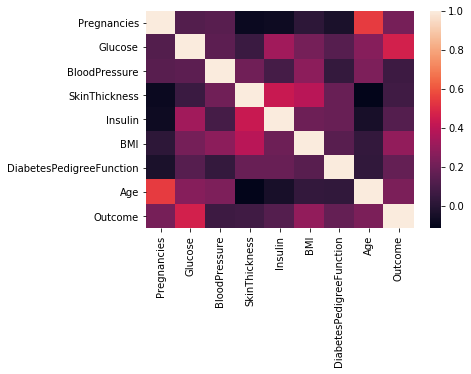

In [38]:
# Corelation heat map
sns.heatmap(cor)

**The correlation plot shows the relation between the parameters.**

* *Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.* *
* *Insulin and DiabetesPedigreeFunction have little correlation with the outcome.* *
* *BloodPressure and SkinThickness have tiny correlation with the outcome.* *
* *There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose* *

In [67]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

In [68]:
dataframe= pd.read_csv(Diabetes)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

In [69]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [70]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df_before_scale)

In [71]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(robust_scaled_df, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


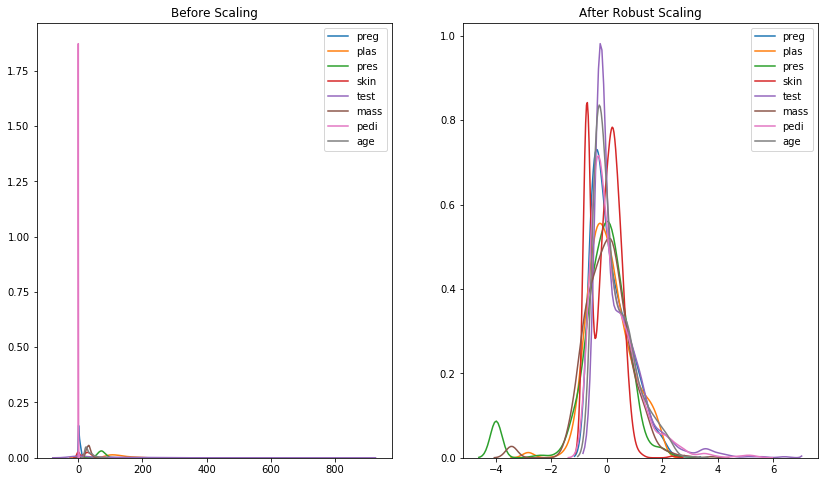

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

In [73]:
#Feature Engineering
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] 
y= df['Outcome'] 

In [74]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [75]:
# train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
# Find accuracy of models.
results = []
kfold = StratifiedKFold(n_splits=10, random_state=0)
cv_result = cross_val_score(logreg, X_train, y_train, cv = kfold, scoring = "accuracy")
results.append(tuple([cv_result.mean(), cv_result.std()]))

In [77]:
results

[(0.7605365431912232, 0.04281455357923341)]

In [78]:
print('{:2.2f} (+/-) {:2.2f} '.format(results[0][0] * 100, results[0][1] * 100))

76.05 (+/-) 4.28 


In [79]:
# make class predictions for the testing set
# returns 1 or 0 for every instance in the testing set
y_pred_class = logreg.predict(X_test)

In [80]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8181818181818182


In [81]:
# CONFUSION MATRIX
# IMP : first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)

[[98  9]
 [19 28]]


In [87]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

   micro avg       0.82      0.82      0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



***Logistic regression gives us a score of 82% accuracy***

In [92]:
# train a Decision Tree Classifier model on the training set
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
# Find accuracy of models.
results = []
kfold = StratifiedKFold(n_splits=10, random_state=0)
cv_result = cross_val_score(Dtc, X_train, y_train, cv = kfold, scoring = "accuracy")
results.append(tuple([cv_result.mean(), cv_result.std()]))

In [94]:
results

[(0.7004616688910714, 0.042506637705962386)]

In [95]:
print('{:2.2f} (+/-) {:2.2f} '.format(results[0][0] * 100, results[0][1] * 100))

70.05 (+/-) 4.25 


In [99]:
# make class predictions for the testing set
# returns 1 or 0 for every instance in the testing set
y_pred_class = Dtc.predict(X_test)

In [100]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7662337662337663


In [101]:
# CONFUSION MATRIX
# IMP : first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)
#Plot the confusion matrix
sns.set(font_scale=1.5)

[[87 20]
 [16 31]]


***Decision Tree gives us a score of 76% accuracy***

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = []

models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Ranom Forest:",RandomForestClassifier(n_estimators=5)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))

print('Models appended...')

Models appended...


In [103]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Naive Bayes: 73.78106821787414
K-Nearest Neighbour: 67.42728714965628
Support Vector Machine-linear: 75.88577472236912
Support Vector Machine-rbf: 64.01639344262296
Ranom Forest: 72.47752511898466
eXtreme Gradient Boost: 74.75409836065575


***Logistic Regression model is best among all the other models with the highest score of 82%***

In [104]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    107
1     47
Name: Outcome, dtype: int64

In [105]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3051948051948052

In [106]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6948051948051948

In [107]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6948051948051948

In [108]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.694805
Name: Outcome, dtype: float64

In [ ]:
#Comparing the true and predicted response values

In [109]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
False: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0]


Conclusion:

Classification accuracy is the easiest classification metric to understand
But, it does not tell you the underlying distribution of response values
We examine by calculating the null accuracy
And, it does not tell you what "types" of errors your classifier is making

In [110]:
# Confusion Matrix
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[87 20]
 [16 31]]


In [111]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0]


In [112]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[87 20]
 [16 31]]


In [113]:
# Classification Accuracy
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7662337662337663
0.7662337662337663


In [114]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.23376623376623376
0.23376623376623373


In [ ]:
# Sensitivity also known as "True Positive Rate" or "Recall"

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

Specificity: When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
    all negative = TN + FP

In [116]:
# Specificity: When the actual value is negative

specificity = TN / (TN + FP)

print(specificity)

0.8130841121495327


In [117]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?


false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.18691588785046728
0.1869158878504673


Precision: When a positive value is predicted, how often is the prediction correct?

    How "precise" is the classifier when predicting positive instances?

In [118]:
# Precision: When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.6078431372549019
0.6078431372549019


Conclusion:

Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection

In [119]:
# Adjusting the classification threshold

# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [120]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.09413587, 0.90586413],
       [0.79144035, 0.20855965],
       [0.85515016, 0.14484984],
       [0.39589179, 0.60410821],
       [0.82299231, 0.17700769],
       [0.92654034, 0.07345966],
       [0.30672301, 0.69327699],
       [0.25096059, 0.74903941],
       [0.56366471, 0.43633529],
       [0.64221618, 0.35778382]])

Row: observation

Each row, numbers sum to 1
Column: class

2 response classes there 2 columns
    column 0: predicted probability that each observation is a member of class 0
    column 1: predicted probability that each observation is a member of class 1
Importance of predicted probabilities

We can rank observations by probability of diabetes
Prioritize contacting those with a higher probability
predict_proba process

Predicts the probabilities
Choose the class with the highest probability
There is a 0.5 classification threshold

Class 1 is predicted if probability > 0.5
Class 0 is predicted if probability < 0.5

In [121]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.90586413, 0.20855965, 0.14484984, 0.60410821, 0.17700769,
       0.07345966, 0.69327699, 0.74903941, 0.43633529, 0.35778382])

In [122]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [123]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 16

Text(0, 0.5, 'Frequency')

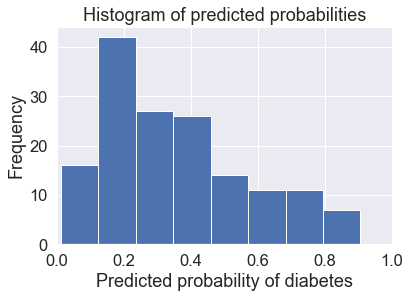

In [124]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

We can see from the third bar

About 45% of observations have probability from 0.2 to 0.3
Small number of observations with probability > 0.5
This is below the threshold of 0.5
Most would be predicted "no diabetes" in this case
Solution

Decrease the threshold for predicting diabetes
Increase the sensitivity of the classifier
This would increase the number of TP
More sensitive to positive instances
Example of metal detector
Threshold set to set off alarm for large object but not tiny objects
YES: metal, NO: no metal
We lower the threshold amount of metal to set it off
It is now more sensitive to metal
It will then predict YES more often

In [126]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [127]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


Conclusion:

    Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
    Threshold can be adjusted to increase sensitivity or specificity
    Sensitivity and specificity have an inverse relationship
    Increasing one would always decrease the other
    Adjusting the threshold should be one of the last step you do in the model-building process
    The most important steps are
    Building the models
    Selecting the best model

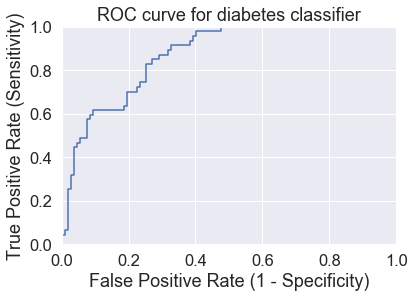

In [128]:
# Receiver Operating Characteristic (ROC) Curves

# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)